In [1]:
# This script represents my effort to teach myself a bit of data science in Python. 
# Here is a list of the sources I'm using. 
    # 1. Books proper:
        # 1a. Grus, Data Science From Scratch
        # 1b. McKinney, Python for Data Analysis, 2nd ed. (I found this more helpful than Grus,
        # who doesn't even show some very basic libraries--seems more like a course in first principles).
        # 1c. Sheppard, Introduction to Python for Econometrics, Statistics and Numerical Analysis: Fourth Edition
            # (found using Sullivan's website). 
        # 1d. VanderPlas, Python Data Science Handbook. I found this one late while looking for the way to make
            # a pivot table. It may be the best one so far, though. It looks to have a lot more real-world
            # data strewn throughout, and used early on, than the others, which is how I teach, but not how
            # most books are written. This seems to be the one to pick up. 
    # 2. Websites: 
        # 2a. Daniel Sullivan, Stata to Python Equivalents (found via Google): https://archive.ph/EVt9d
        # 2b. Learn X in Y Minutes (author unknown; recommended by Sullivan, though I noticed that the line
        # about "executable pseudo-code" is also quoted in Grus or McKinney): https://archive.ph/sZeGv
    # 3. Youtube. 
        # 3a. This playlist from "DataDaft" (Greg Hamel)
        # https://www.youtube.com/watch?v=2_6O39UdFi0&list=PLiC1doDIe9rCYWmH9wIEYEXXaJ4KAi3jc&ab_channel=DataDaft

In [2]:
# First, let's import the pandas tool. 
import pandas as pd # We name this in the standard way: "pd" will be a prefix of many functions later. 
from pandas import Series, DataFrame # This step is useful, too. 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [3]:
# Let's import some data quickly. 
df = pd.read_stata('~/desktop/python/data/cps19mod.dta') 
    # I had to modify these data because many value-labels in Stata data-sets have repeats in the value-label
    # which confuses Python; see some discussion of that here: https://archive.ph/nfqlL. 

In [4]:
excerpt = df.head(25)
print(excerpt)

    year  month  minsamp          hhid  hhid2  hrsample  hrsersuf  hhnum  \
0   2019      8        8  5.061104e+08   8011         8         1      1   
1   2019      8        8  5.061104e+08   8011         8         1      1   
2   2019      9        8  5.096106e+08   8011         8         1      1   
3   2019      9        8  5.096106e+08   8011         8         1      1   
4   2019      9        8  5.096106e+08   8011         8         1      1   
5   2019      7        8  4.795111e+09   8111         8        11      1   
6   2019      3        4  4.795111e+09   9011         9         1      1   
7   2019      3        4  4.795111e+09   9011         9         1      1   
8   2019      7        8  4.795111e+09   8111         8        11      1   
9   2019      7        8  4.795111e+09   8111         8        11      1   
10  2019      8        8  4.929211e+09   8011         8         1      1   
11  2019      8        8  4.929211e+09   8011         8         1      1   
12  2019    

In [5]:
# We can ask for information about the whole data-set. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291390 entries, 0 to 291389
Data columns (total 33 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   year      291390 non-null  int16   
 1   month     291390 non-null  int8    
 2   minsamp   291390 non-null  int8    
 3   hhid      291390 non-null  float64 
 4   hhid2     291390 non-null  int16   
 5   hrsample  291390 non-null  int8    
 6   hrsersuf  291390 non-null  int8    
 7   hhnum     291390 non-null  int8    
 8   hrlonglk  291390 non-null  category
 9   fnlwgt    290217 non-null  float32 
 10  orgwgt    290217 non-null  float32 
 11  lonwgt    273220 non-null  float32 
 12  famwgt    291390 non-null  float32 
 13  age       291390 non-null  int8    
 14  female    291390 non-null  int8    
 15  wbho      291390 non-null  category
 16  wbhaom    291390 non-null  category
 17  forborn   291390 non-null  int8    
 18  citizen   291390 non-null  int8    
 19  vet       285558 non-nu

In [6]:
df.shape[0] # This returns our n

291390

In [7]:
df['wbhaom'].describe() # This gives information about a specific variable

count     291390
unique         6
top        White
freq      200258
Name: wbhaom, dtype: object

In [8]:
pd.crosstab(df['female'], df['union']) # We can make a two-way table 
pd.crosstab(df.female,df.union, normalize='index') # and this adds percentages (Nb that this is not found in Sullivan;
    # see here: https://archive.ph/c2eTT)

union,0.0,1.0
female,,
0,0.880737,0.119263
1,0.890425,0.109575


In [9]:
%matplotlib inline 

In [10]:
data = np.arange(10)

In [11]:
print(data)

[0 1 2 3 4 5 6 7 8 9]


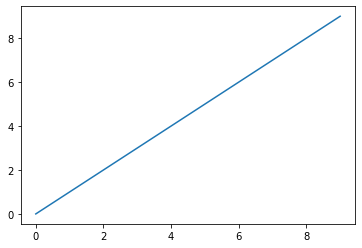

In [12]:
plt.plot(data)

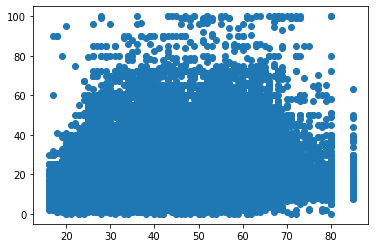

In [13]:
plt.scatter(df['age'], df['wage1']) 

In [14]:
df['educ92'].describe()

count               291390
unique                  16
top       HS graduate, GED
freq                 82795
Name: educ92, dtype: object

In [15]:
df['education'] = df['educ92'].cat.codes #needed to convert education to a float
df['education'].describe()

count    291390.000000
mean          9.456234
std           2.710904
min           0.000000
25%           8.000000
50%           9.000000
75%          12.000000
max          15.000000
Name: education, dtype: float64

In [16]:
print(df['age'].isnull().sum()) 
# checking for missing values because Python can't do OLS with any values missing https://archive.ph/4HGum 

0


In [17]:
print(df['wage1'].isnull().sum()) #uh oh!

201507


In [18]:
print(df['education'].isnull().sum())

0


In [19]:
clean = df.dropna(subset=['wage1']) # we make a clean data-set without those MVs https://archive.ph/tjCFq
print(clean['wage1'].isnull().sum()) # now we check for missing values on that variable
clean = clean[clean['age']<81] # let's drop that awkwardly top-censored set of responses 

0


Text(0, 0.5, 'wages')

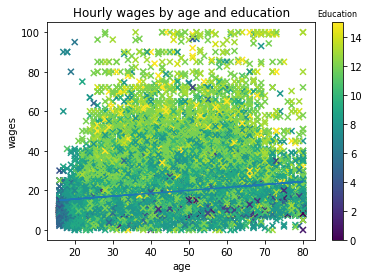

In [20]:
plt.scatter(clean['age'], clean['wage1'], c=clean['education'], marker="x")
    # Syntax: plt.scatter(xvar, yvar, c=zvar, markers=whateverstyle)
    # markers: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
b, m = polyfit(clean['age'], clean['wage1'], 1)
    # this obtains a slope and intercept from OLS
clb = plt.colorbar()
    # we add the color bar defined by c=zvar above; see https://archive.ph/vqRiK
clb.ax.set_title('Education',fontsize=8)
    # and now add a title
plt.plot(clean['age'], (m*clean['age'])+b)
    # and now add the regression live
plt.title('Hourly wages by age and education') # we add a title...
plt.xlabel('age')
plt.ylabel('wages')

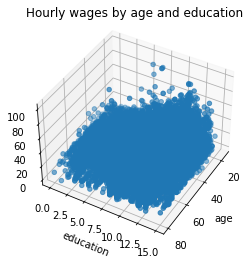

In [29]:
ax = plt.axes(projection='3d')
ax.scatter3D(clean['age'], clean['education'], clean['wage1'])
plt.title('Hourly wages by age and education') # we add a title...
plt.xlabel('age')
plt.ylabel('education')
ax.view_init(40, 30)

TypeError: Input z must be 2D, not 1D

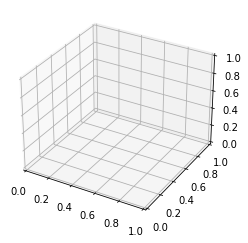

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(clean['age'], clean['education'], clean['wage1'], 50, cmap='binary')